In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [89]:
df = pd.read_csv("medical_examination.csv")

In [90]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [91]:
df['overwieght_cal'] = df['weight']/(df['height']/100)**2

In [92]:
df.loc[df['overwieght_cal'] > 25, 'overweight'] = '1'
df.loc[df['overwieght_cal'] <= 25, 'overweight'] = '0'
df['overweight'] = df['overweight'].astype(int)

In [93]:
df['cholesterol'].replace(
    {
        1: 0,
        3: 1,
        2: 1
    },
    inplace=True
)

df['gluc'].replace(
    {
        1: 0,
        3: 1,
        2: 1
    },
    inplace=True
)

C:\Users\shuto\AppData\Local\Temp\ipykernel_34672\2625027513.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cholesterol'].replace(
C:\Users\shuto\AppData\Local\Temp\ipykernel_34672\2625027513.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

In [58]:
pd.melt(df, id_vars= ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], value_vars= 'cardio')

,cholesterol,gluc,smoke,alco,active,overweight,variable,value
0,0,0,0,0,1,0,cardio,0
1,1,0,0,0,1,1,cardio,1
2,1,0,0,0,0,0,cardio,1
3,0,0,0,0,1,1,cardio,1
4,0,0,0,0,0,0,cardio,0
...,...,...,...,...,...,...,...,...
69995,0,0,1,0,1,1,cardio,0
69996,1,1,0,0,1,1,cardio,1
69997,1,0,0,1,0,1,cardio,1
69998,0,1,0,0,0,1,cardio,1


In [60]:
df_cat = pd.melt(df, id_vars= 'cardio', value_vars= ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


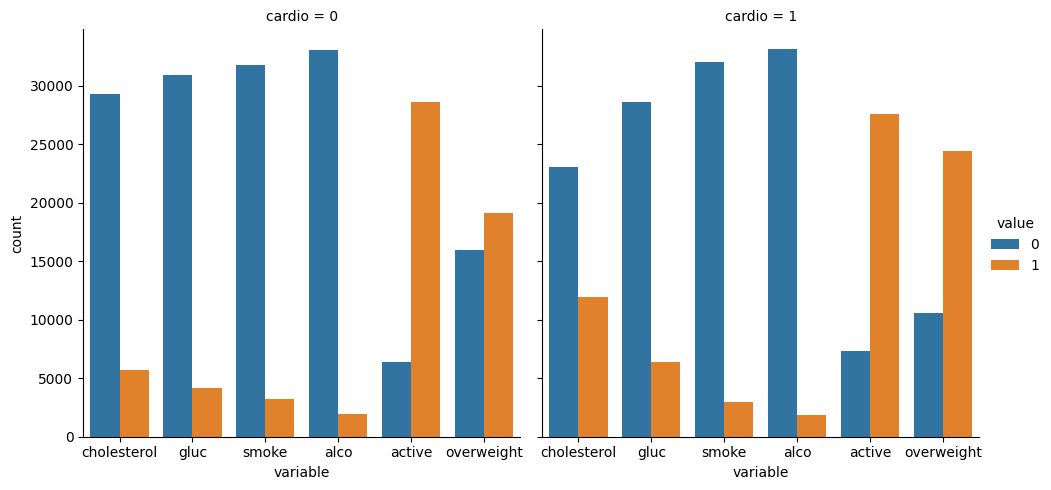

In [63]:
sns.catplot(x = 'variable', col= 'cardio', hue = 'value', data = df_cat, kind = 'count')

## HEAT MAP

In [94]:
filtered_df = df[(df['height'] > df['height'].quantile(0.025)) & (df['height'] < df['height'].quantile(0.975))]
filtered_df 

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overwieght_cal,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [95]:
filtered_df = filtered_df[filtered_df['ap_lo'] <= filtered_df['ap_hi']]
filtered_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overwieght_cal,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [96]:
filtered_df = df[(df['weight'] > df['weight'].quantile(0.025)) & (df['weight'] < df['weight'].quantile(0.975))]
filtered_df 

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overwieght_cal,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [98]:
af_list = [
    'id', 
    'age', 
    'sex', 
    'height', 
    'weight', 
    'ap_hi', 
    'ap_lo', 
    'cholesterol',
    'gluc', 
    'smoke', 
    'alco', 
    'active', 
    'cardio', 
    'overweight'
]

filtered_df = filtered_df[af_list]
filtered_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [101]:
corr_matrix = filtered_df.corr()
corr_matrix

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002948,0.003497,-0.003293,-0.000103,0.003556,-0.002586,0.004212,0.001354,-0.002778,0.000461,0.004271,0.003229,0.000765
age,0.002948,1.000000,-0.025593,-0.085140,0.061779,0.019561,0.018430,0.130282,0.088936,-0.046311,-0.028957,-0.010437,0.239244,0.091845
sex,0.003497,-0.025593,1.000000,0.492850,0.152258,0.004776,0.013974,-0.038759,-0.022037,0.338181,0.169626,0.006248,0.000365,-0.061849
height,-0.003293,-0.085140,0.492850,1.000000,0.267923,0.003064,0.002874,-0.061408,-0.030925,0.186494,0.090435,-0.004399,-0.028412,-0.171516
weight,-0.000103,0.061779,0.152258,0.267923,1.000000,0.027383,0.036668,0.129982,0.101591,0.063287,0.062126,-0.012632,0.165927,0.634250
ap_hi,0.003556,0.019561,0.004776,0.003064,0.027383,1.000000,0.014860,0.023829,0.011648,-0.001503,0.000822,0.000181,0.052389,0.018264
ap_lo,-0.002586,0.018430,0.013974,0.002874,0.036668,0.014860,1.000000,0.024922,0.012344,0.003954,0.011152,0.004400,0.062593,0.026348
cholesterol,0.004212,0.130282,-0.038759,-0.061408,0.129982,0.023829,0.024922,1.000000,0.382793,0.013975,0.040324,0.005244,0.203902,0.129586
gluc,0.001354,0.088936,-0.022037,-0.030925,0.101591,0.011648,0.012344,0.382793,1.000000,-0.003417,0.014996,-0.008480,0.089236,0.088079
smoke,-0.002778,-0.046311,0.338181,0.186494,0.063287,-0.001503,0.003954,0.013975,-0.003417,1.000000,0.342768,0.028811,-0.019415,-0.008212


<Axes: >

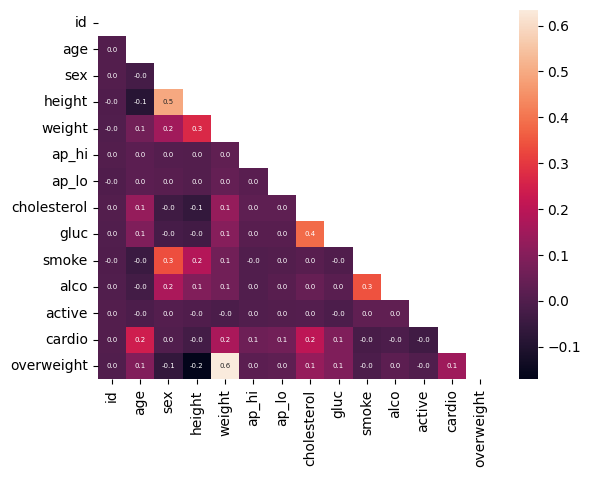

In [110]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the correlation matrix with the upper triangle masked
sns.heatmap(corr_matrix, annot = True, mask=mask, annot_kws={"fontsize": 5}, fmt = ".1f")